Exercise 1 Getting Data 

,2018-05-04,2018-08-27,2018-06-08,2018-08-22,2018-07-19,2018-05-23,2018-01-18,2018-07-30,2018-05-10,2018-05-22,...,2018-01-19,2018-07-10,2018-01-25,2018-06-29,2018-01-10,2018-01-05,2018-06-26,2018-03-28,2018-04-20,2018-01-15
CAD,1.5410,1.5182,1.5274,1.5126,1.5351,1.5109,1.5229,1.5245,1.5172,1.5066,...,1.5246,1.5382,1.5289,1.5442,1.4931,1.5068,1.5549,1.5974,1.5557,1.5263
HKD,9.3952,9.1318,9.2222,9.1184,9.0963,9.1904,9.5648,9.1696,9.3241,9.2565,...,9.5814,9.1926,9.6996,9.1468,9.3809,9.4188,9.1608,9.7295,9.6568,9.6050
ISK,122.2000,124.6000,124.7000,124.8000,124.4000,123.8000,NaN,122.8000,122.4000,123.6000,...,NaN,125.4000,NaN,123.4000,NaN,NaN,125.2000,121.5000,123.3000,NaN
PHP,61.8470,61.9970,62.0680,62.0280,62.1800,61.4320,62.0680,62.1140,61.7680,61.6450,...,62.1380,62.6470,63.1890,62.1740,60.6240,60.0650,62.7140,64.8730,64.1790,61.7530
DKK,7.4492,7.4582,7.4476,7.4588,7.4537,7.4495,7.4475,7.4493,7.4496,7.4478,...,7.4454,7.4536,7.4444,7.4525,7.4469,7.4459,7.4510,7.4513,7.4477,7.4496


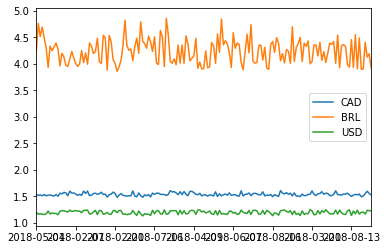

In [11]:
import pandas as pd
import requests as rest
import matplotlib.pyplot as plt

r = rest.get("https://api.exchangeratesapi.io/history?start_at=2018-01-01&end_at=2018-09-01")
# Read it as json
json = r.json()
rate = json['rates']

# make a data frame
df = pd.DataFrame.from_dict(rate)
pd.DataFrame.from_dict(rate)

transposedDF = df.transpose()
transposedDF[{'USD','CAD', 'BRL'}].plot()
df.head()

#### Exercise 2: Searching Flickr
_____


In [183]:
print("Input a tag")
tag = "tag"#input()
params = {'tag': tag, "format" : "json", "nojsoncallback": 1}
r = rest.get("https://www.flickr.com/services/feeds/photos_public.gne", params=params)
json = r.json()
json

Input a tag


{'title': 'Uploads from everyone',
 'link': 'https://www.flickr.com/photos/',
 'description': '',
 'modified': '2019-09-17T18:40:54Z',
 'generator': 'https://www.flickr.com',
 'items': [{'title': 'FB_IMG_1568744814673',
   'link': 'https://www.flickr.com/photos/184469174@N02/48750242193/',
   'media': {'m': 'https://live.staticflickr.com/65535/48750242193_e6dfdfe126_m.jpg'},
   'date_taken': '2019-09-17T11:26:54-08:00',
   'description': ' <p><a href="https://www.flickr.com/people/184469174@N02/">ngochieu2016pt</a> posted a photo:</p> <p><a href="https://www.flickr.com/photos/184469174@N02/48750242193/" title="FB_IMG_1568744814673"><img src="https://live.staticflickr.com/65535/48750242193_e6dfdfe126_m.jpg" width="240" height="146" alt="FB_IMG_1568744814673" /></a></p> ',
   'published': '2019-09-17T18:40:54Z',
   'author': 'nobody@flickr.com ("ngochieu2016pt")',
   'author_id': '184469174@N02',
   'tags': ''},
  {'title': 'Sandtoft Airfield 1940s Day 2019',
   'link': 'https://www.flic

In [184]:
from IPython.display import Image
from IPython.display import display
urls = []


items = json["items"]
medias = map(lambda x: media['media'], items)
media = map(lambda m: m['m'], medias)

for me in media:
     urls.append(me)
    
images = map(lambda x: Image(x), urls)
display(*images)

In [178]:
from IPython.display import Image
from IPython.display import display

def FlickrByTag(tag):
    params = {'tag': tag, "format" : "json", "nojsoncallback": 1}
    r = rest.get("https://www.flickr.com/services/feeds/photos_public.gne", params=params)
    json = r.json()
    urls = []

    items = json["items"]
    medias = map(lambda res: res['media'], items)
    media = map(lambda m: m['m'], medias)

    for me in media:
         urls.append(me)

    images = map(lambda x: Image(x), urls)
    display(*images)

Now you can run the command with the tag input as:
##### FlickrByTag("Hello World")

#### Extension to support sorting by date
_____

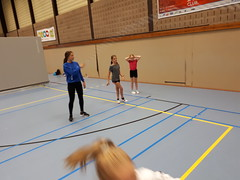

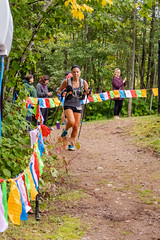

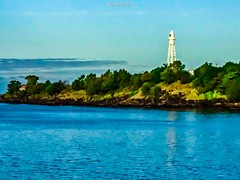

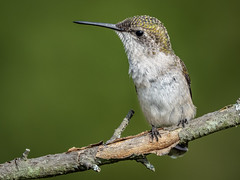

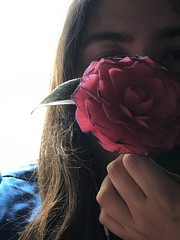

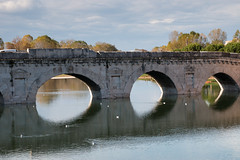

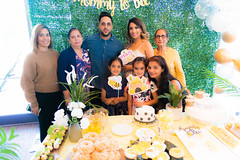

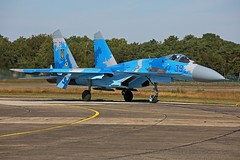

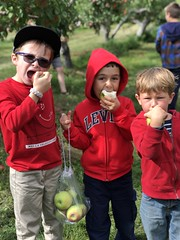

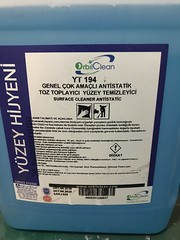

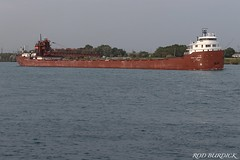

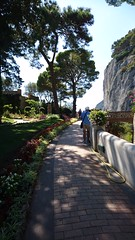

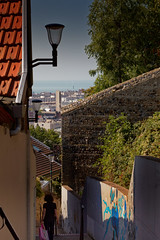

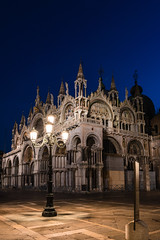

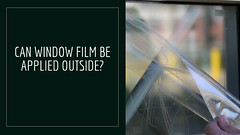

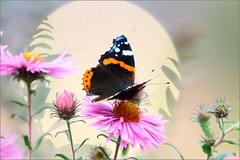

In [209]:
from IPython.display import Image
from IPython.display import display

params = {'tag': tag, "format" : "json", "nojsoncallback": 1}
r = rest.get("https://www.flickr.com/services/feeds/photos_public.gne", params=params)
json = r.json()
urls = []

items = json["items"]
medias = map(lambda res: res['media'], items)
media = map(lambda m: m['m'], medias)

date = map(lambda date: date['published'], items)

image_dict = dict()

#Iterate over two dictionaries
for i, j in zip(media, date):
    image_dict[j] = i

#Sort the images acording to the key
sortedImages = [v for (k, v) in sorted(image_dict.items(), reverse=True)] 
 

images = map(lambda x: Image(x), sortedImages)
display(*images)

Extend the function to also accept a keyword parameter and filter by keyword


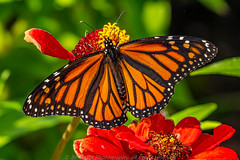

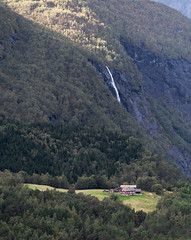

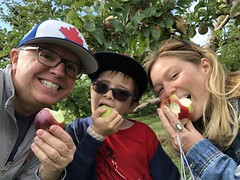

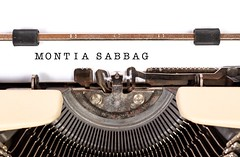

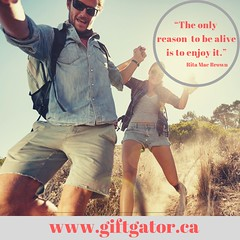

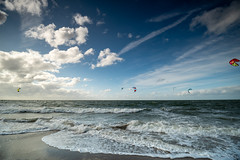

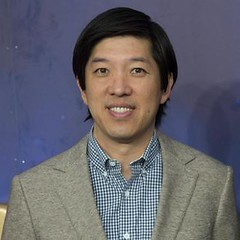

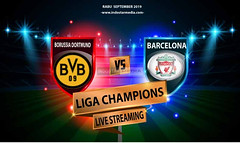

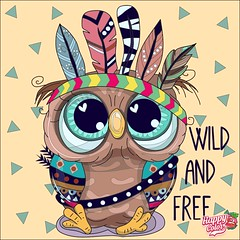

In [240]:
from IPython.display import Image
from IPython.display import display

def FlickrByTagAndKeyword(tag, titleKeyword):
    params = {'tag': tag, "format" : "json", "nojsoncallback": 1}
    r = rest.get("https://www.flickr.com/services/feeds/photos_public.gne", params=params)
    json = r.json()
    urls = []

    items = json["items"]
    itemsWithKeywords = list()
    for i in items:
        if(titleKeyword in i['title']):
            itemsWithKeywords.append(i)

    medias = map(lambda res: res['media'], itemsWithKeywords)
    media = map(lambda m: m['m'], medias)
    date = map(lambda date: date['published'], itemsWithKeywords)

    image_dict = dict()

    #Iterate over two dictionaries
    for i, j in zip(media, date):
        image_dict[j] = i

    #Sort the images acording to the key
    sortedImages = [v for (k, v) in sorted(image_dict.items(), reverse=True)] 


    images = map(lambda x: Image(x), sortedImages)
    display(*images)

FlickrByTagAndKeyword("cat", "o")